# PyDMD

## Tutorial 1: Dynamic Mode Decomposition on a toy dataset

In this tutorial we will show the typical use case, applying the dynamic mode decomposition on the snapshots collected during the evolution of a generic system. We present a very simple system since the main purpose of this tutorial is to show the capabilities of the algorithm and the package interface.

First of all we import the DMD class from the pydmd package, we set matplotlib for the notebook and we import numpy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from pydmd import DMD
from pydmd.bopdmd import BOPDMD
from pydmd.plotter import plot_eigs
from pydmd.plotter import plot_summary
from pydmd.preprocessing.hankel import hankel_preprocessing


We create the input data by summing two different functions:<br>
$f_1(x,t) = \text{sech}(x+3)\cos(1.3t)$<br>
$f_2(x,t) = 2\text{sech}(x)\tanh(x)\sin(2.8t)$.<br>

In [6]:
def f1(x, t):
    return 1.0 / np.cosh(x + 3) * np.cos(2.3 * t)

def f2(x, t):
    return 2.0 / np.cosh(x) * np.tanh(x) * np.sin(2.8 * t)

nx=65
nt=129
x = np.linspace(-5, 5, nx)
t = np.linspace(0, 4 * np.pi, nt)
dt=t[1]-t[0]

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

mean=0
std_dev=0.2
random_matrix = np.random.normal(mean, std_dev, size=(nt, nx))
Xn=X+random_matrix

X.shape

(129, 65)

The plots below represent these functions and the dataset without noise

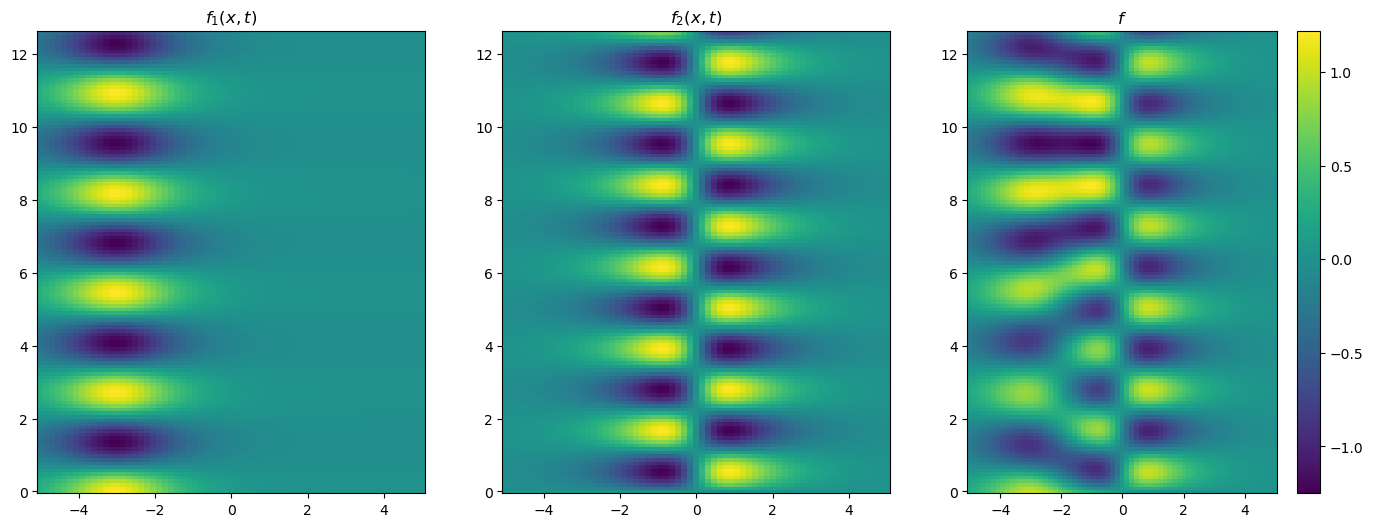

In [7]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$"]
data = [X1, X2, X]

fig = plt.figure(figsize=(17, 6))
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

The plots below represent these functions and the dataset with noise.

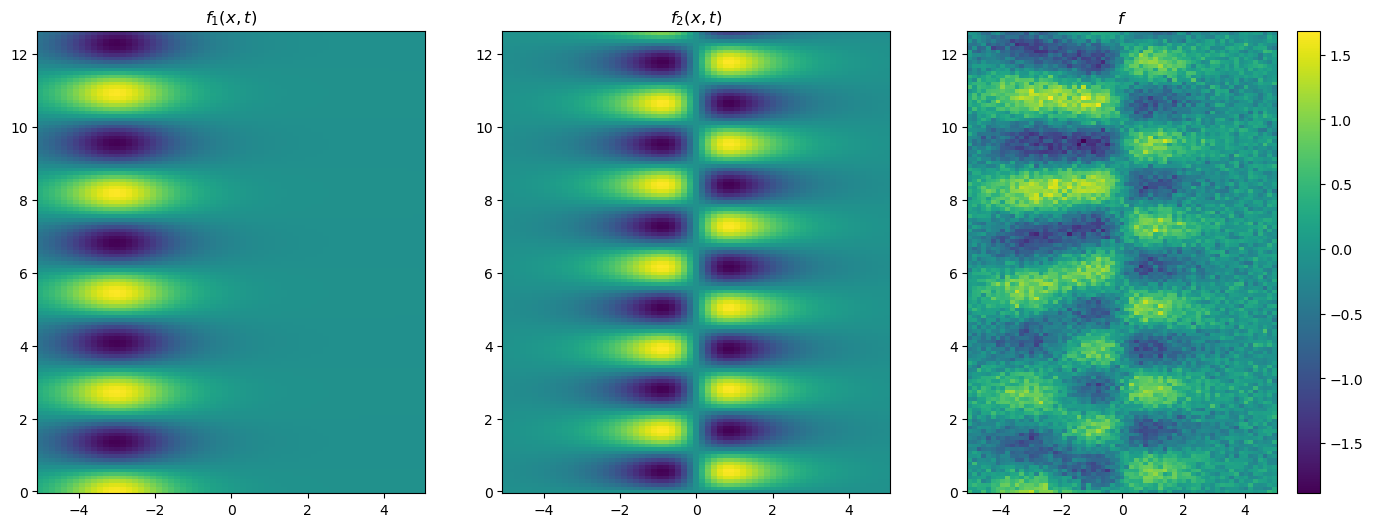

In [8]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f$"]
data = [X1, X2, Xn]

fig = plt.figure(figsize=(17, 6))
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

## DMD steps for handling real data (i.e. data with noise)

step 1: Do a time-delay embedding (d is number of delay embeddings)

step 2: Apply BOP-DMD (num_trials is number of statistical bags)

step 3: OPTIONAL -- Constrain the eigenvalues (i) left-half plane, (ii) imaginary axis, (iii) complex conjugate pairs

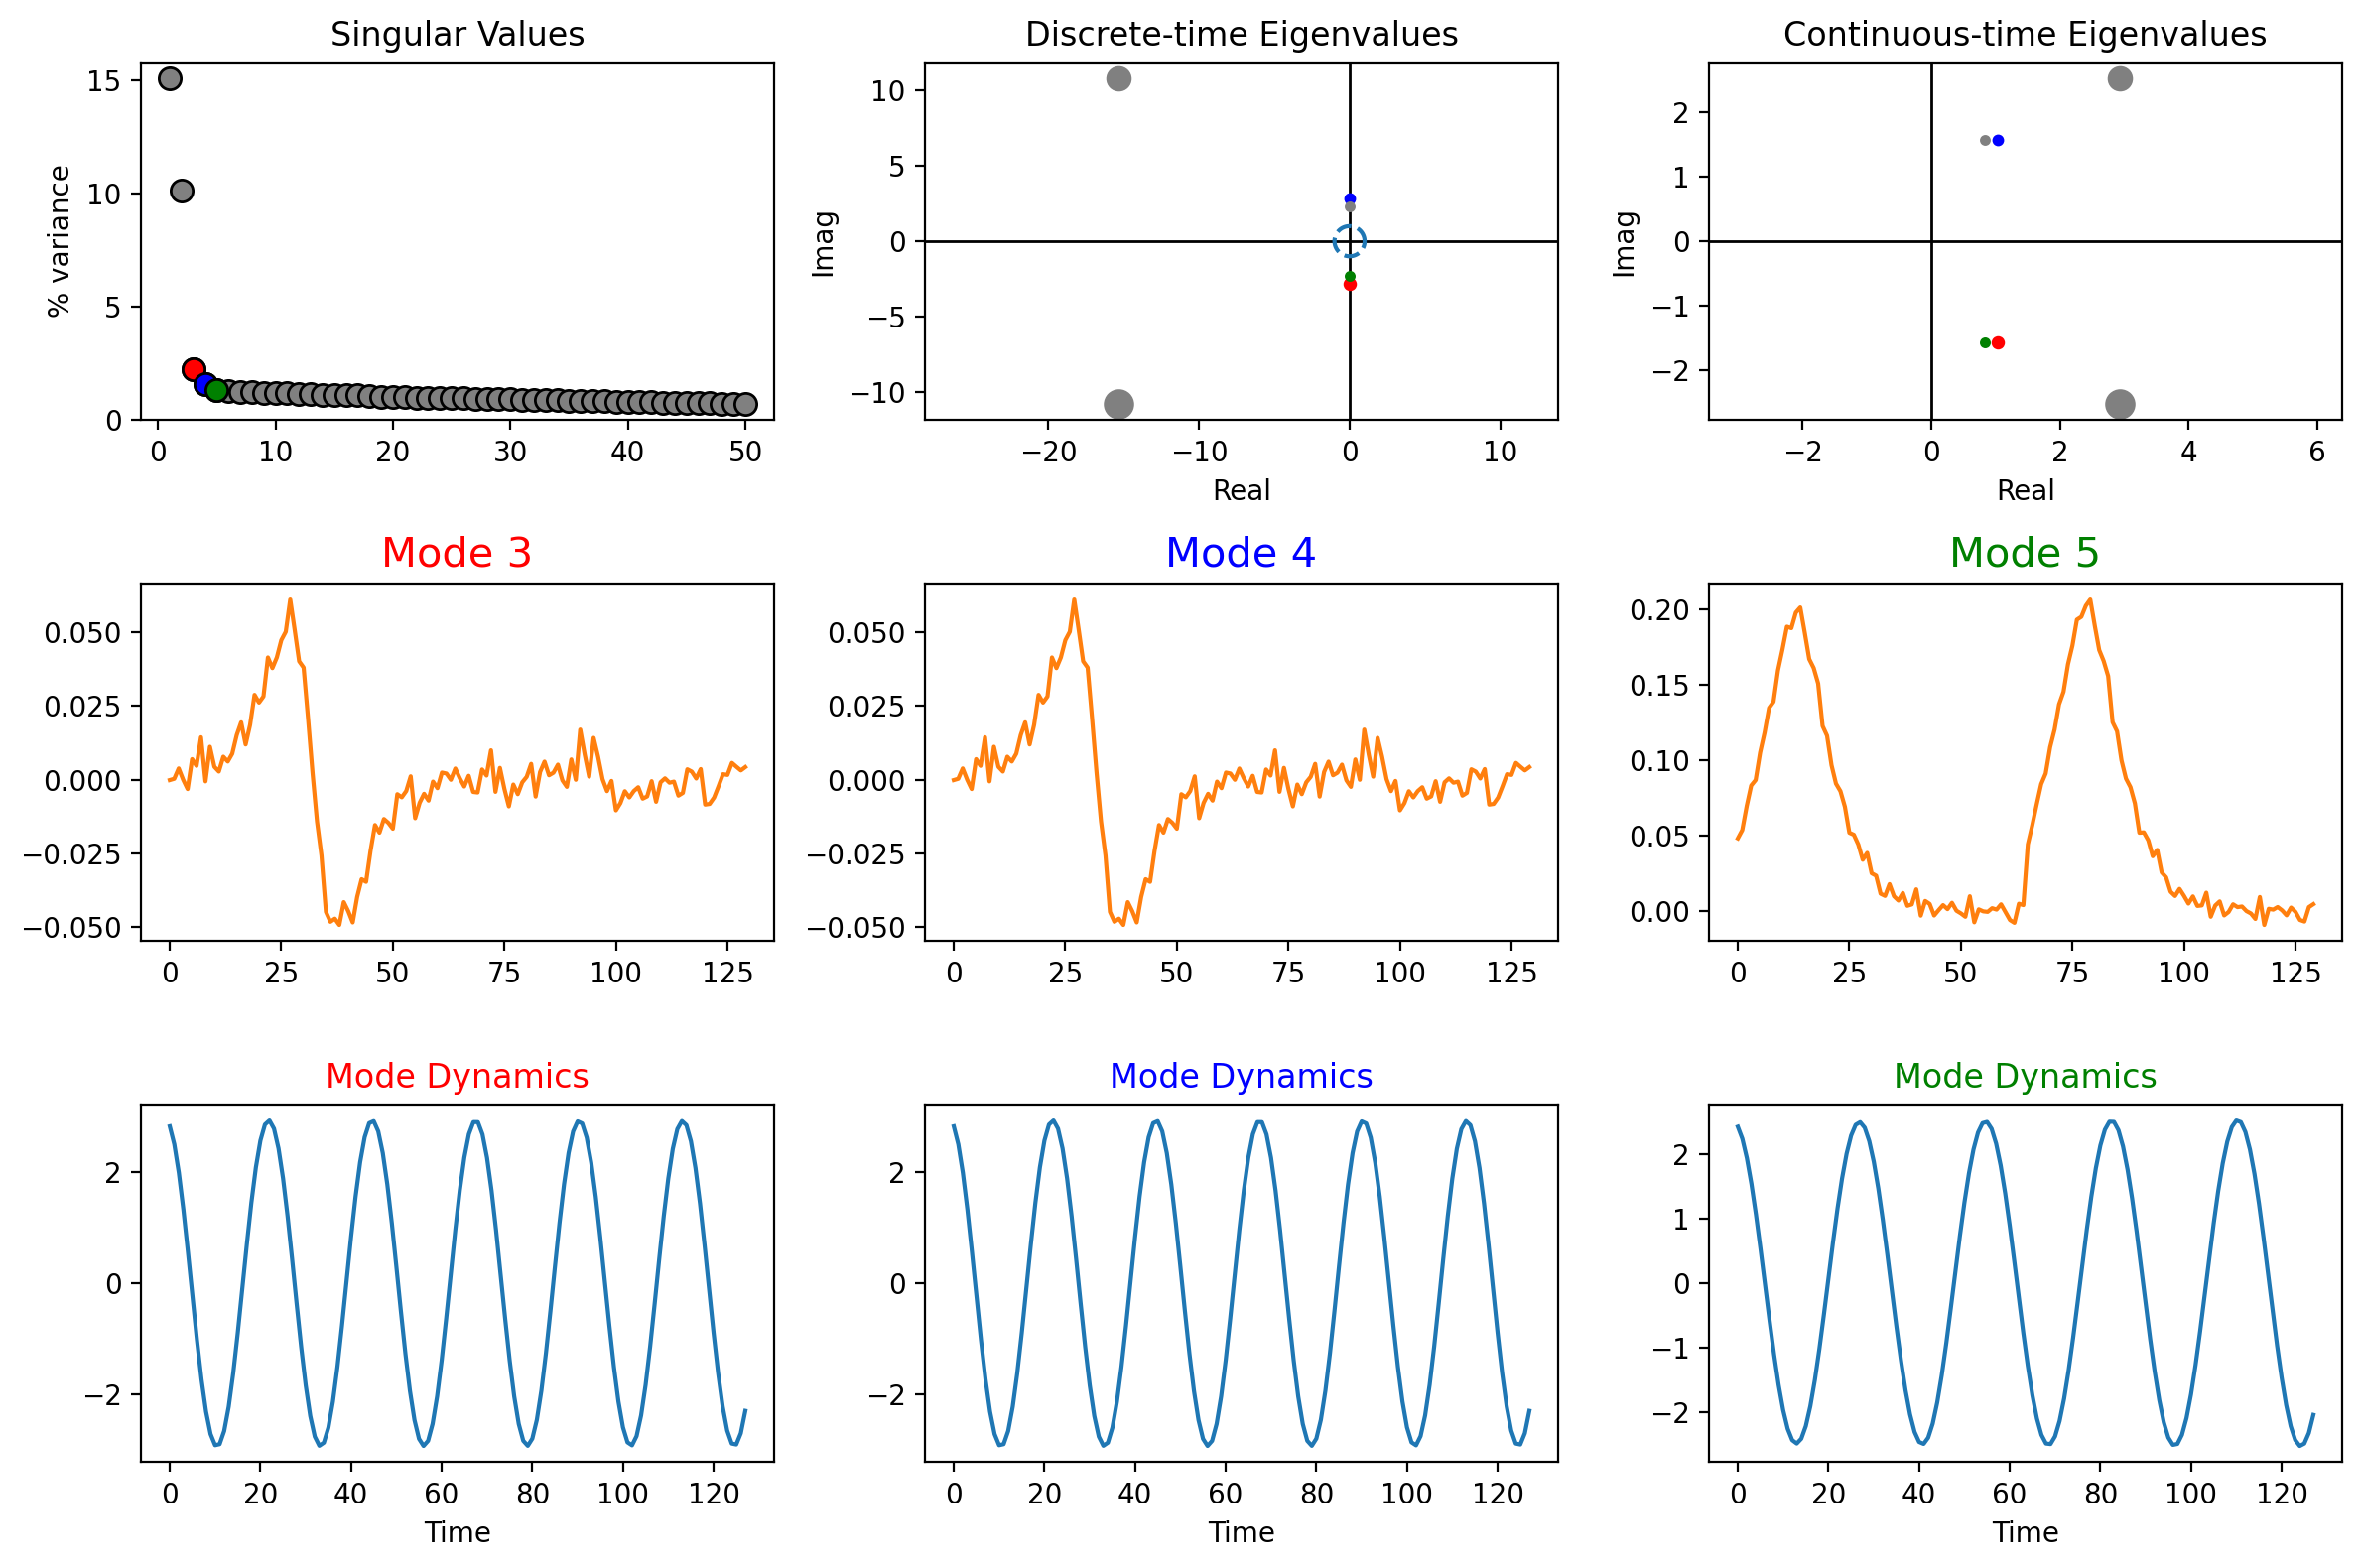

Computed frequencies:
[-1.5332e+01+10.798j -1.5332e+01-10.798j  1.0000e-03 +2.3j
  1.0000e-03 -2.3j   -0.0000e+00 +2.803j -0.0000e+00 -2.803j]


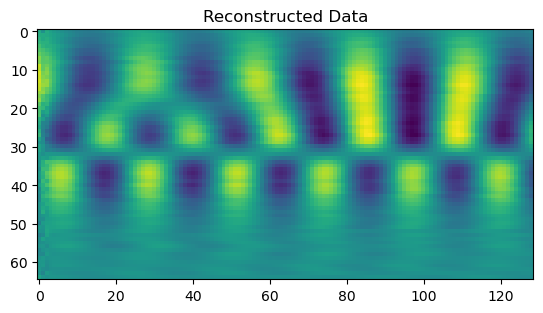

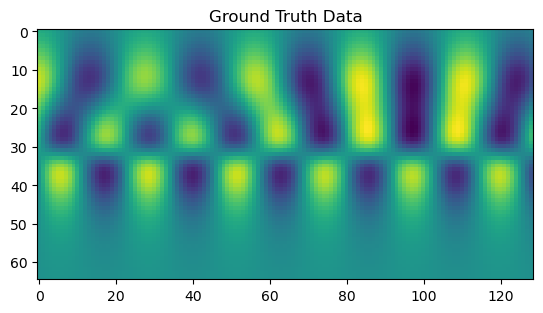

In [25]:
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=6, num_trials=0), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_optdmd.fit(Xn.T, t=t[1:])
plot_summary(delay_optdmd, index_modes=[2,3,4], order='F') # pick correct modes

print("Computed frequencies:")
print(np.round(delay_optdmd.eigs, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()

## DMD with constraints


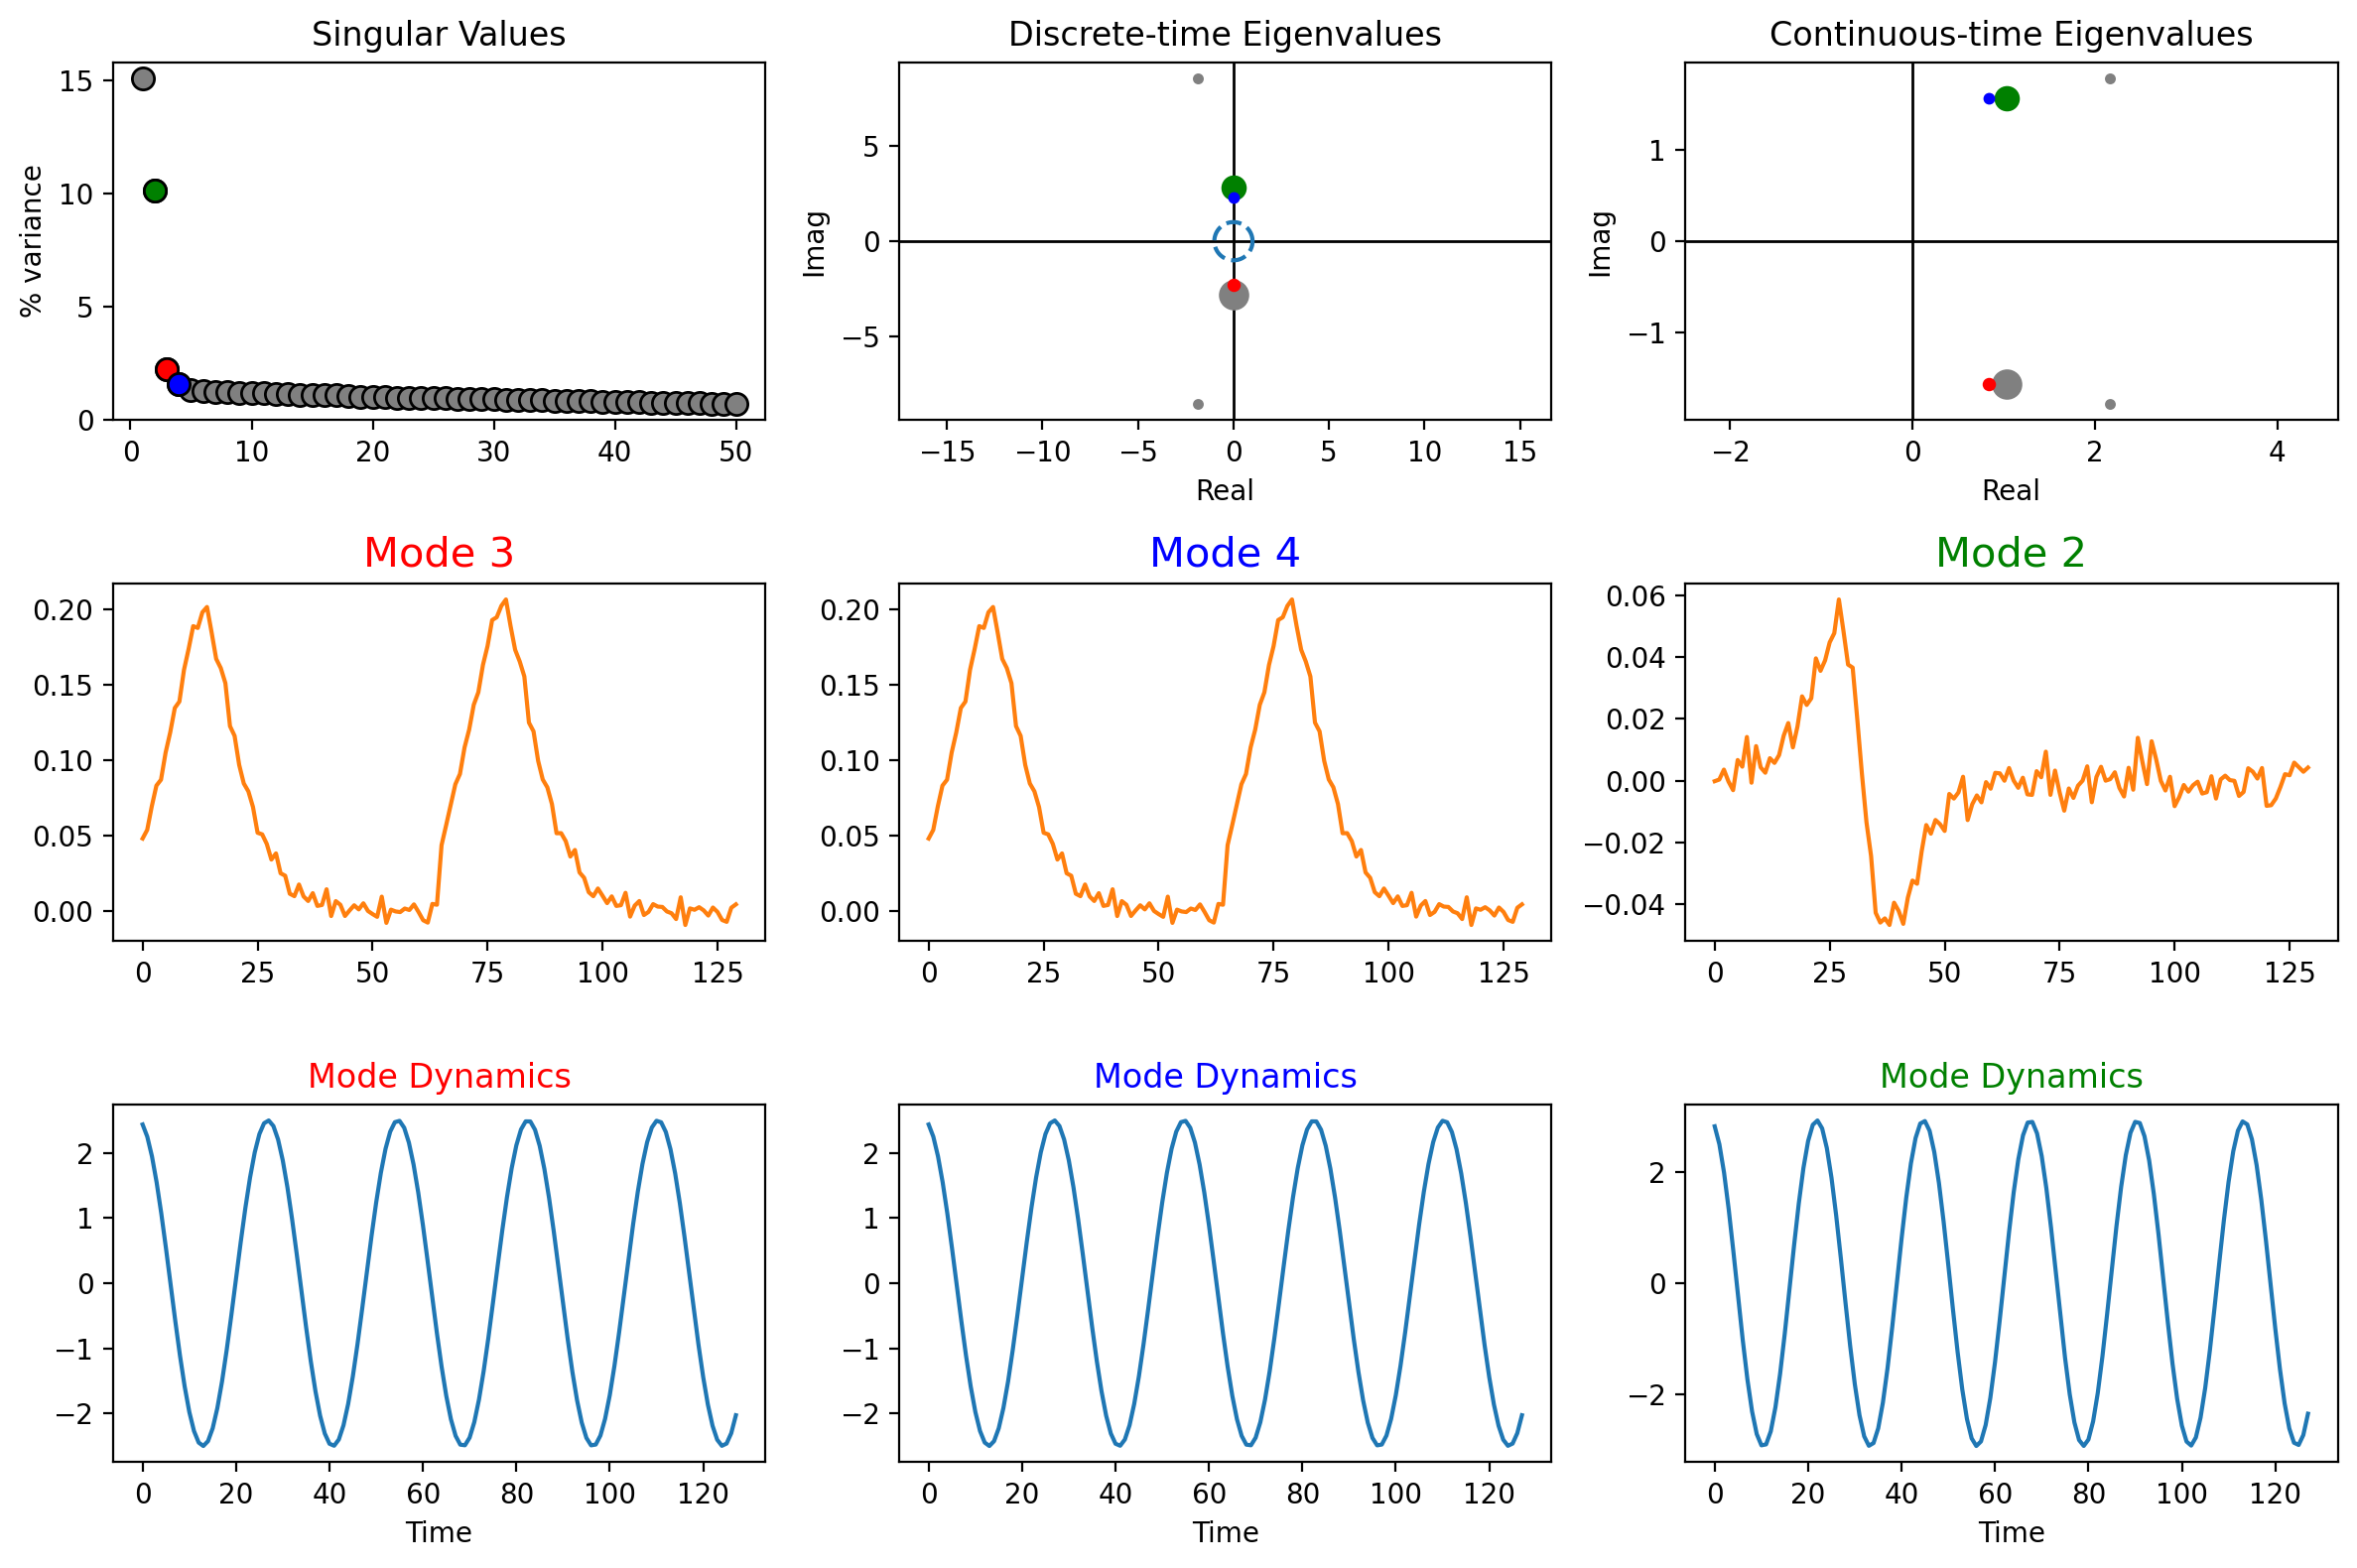

Computed frequencies:
[-1.852+8.518j -1.852-8.518j  0.   +2.3j   -0.   -2.3j   -0.   +2.801j
 -0.   -2.801j]


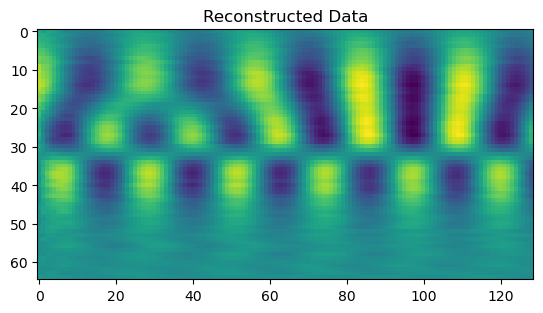

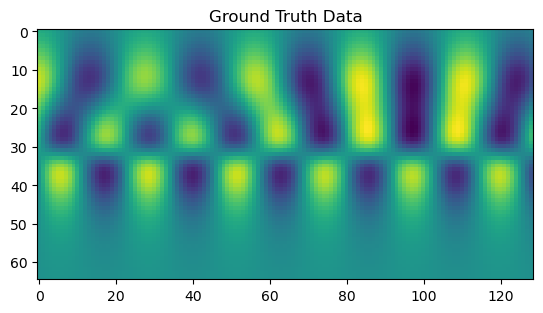

In [23]:
# CONSTRAINTS

# Stable:  constrain to the left-half plane (no real parts to eigenvalues)
#bopdmd = BOPDMD(eig_constraints={"stable"})

# Stable:  constrain to the left-half plane and as complex conjugates
#bopdmd = BOPDMD(eig_constraints={"stable", "conjugate_pairs"})

# Imaginary:  constrain to imaginary axis
#bopdmd = BOPDMD(eig_constraints={"imag"})

# Imaginary:  constrain to imaginary axis and as complex conjugates
#bopdmd = BOPDMD(eig_constraints={"imag", "conjugate_pairs"})


delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=6, num_trials=0, eig_constraints={"stable", "conjugate_pairs"}), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_optdmd.fit(Xn.T, t=t[1:])
plot_summary(delay_optdmd, index_modes=[2,3,1], order='F')

print("Computed frequencies:")
print(np.round(delay_optdmd.eigs, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()

## This is what happens without time-delay embeddings (perfect data using exact DMD)


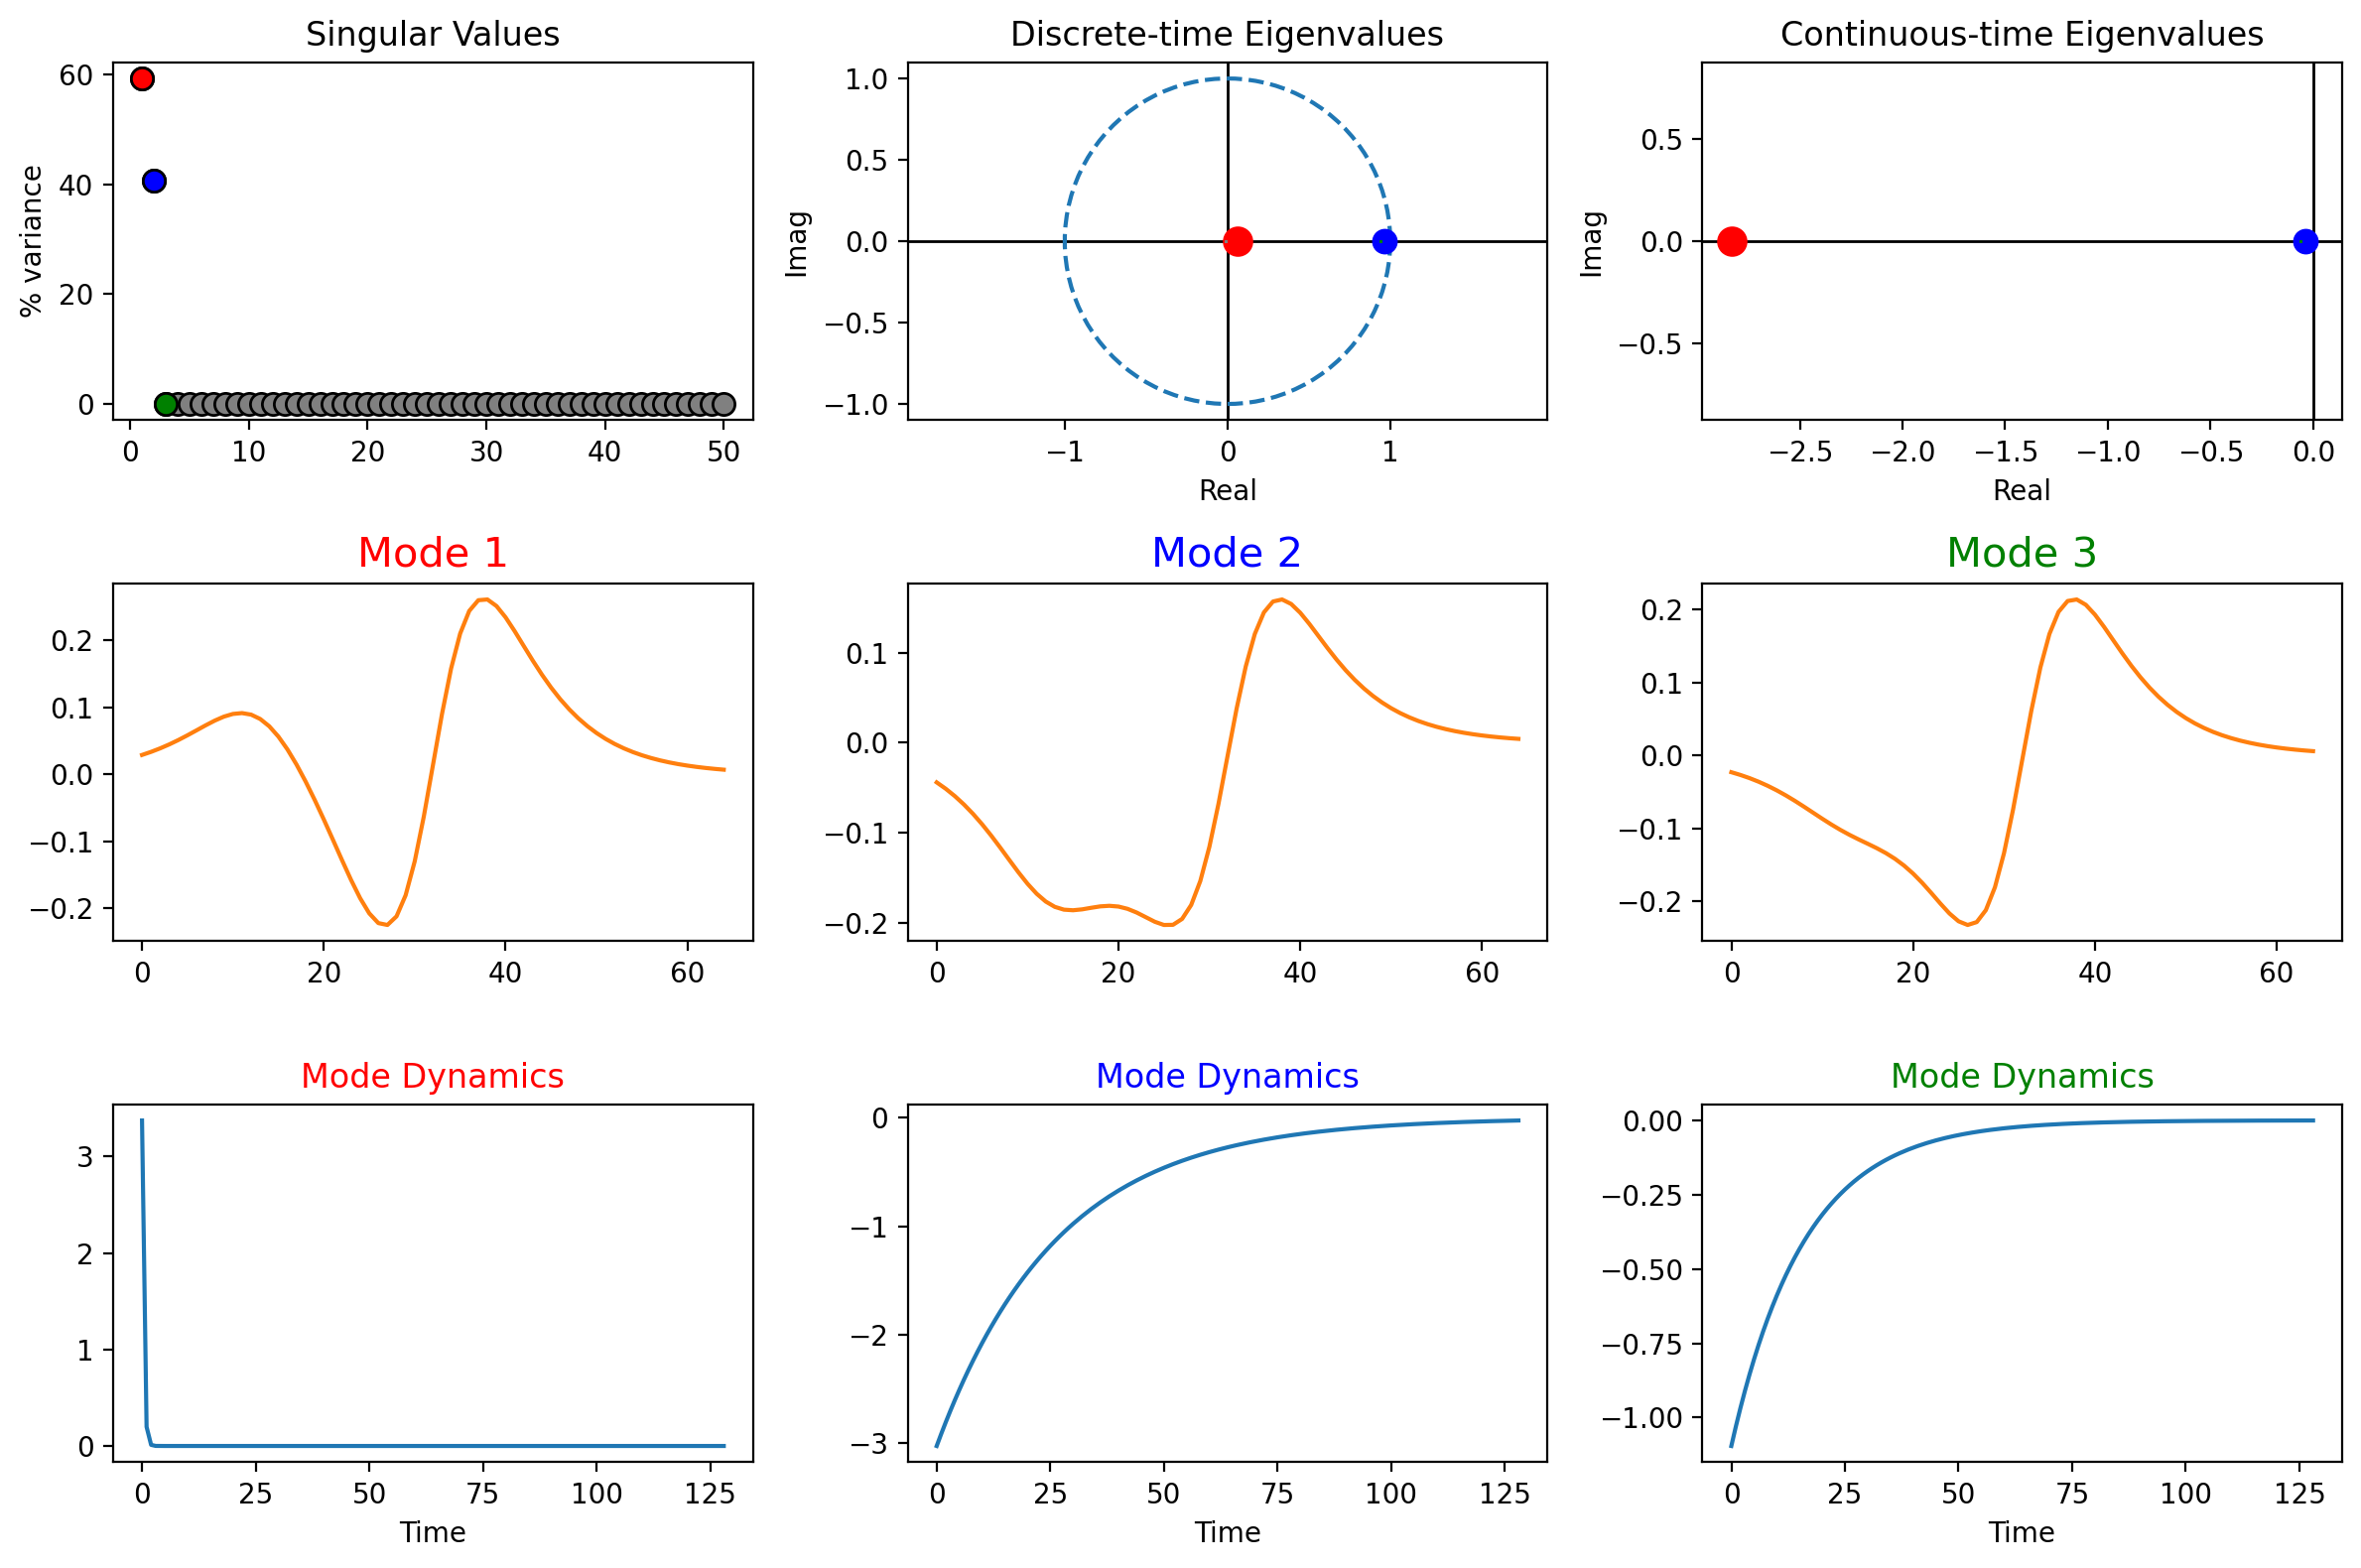

Computed frequencies:
[ -0.384  -0.631 -28.861     nan]


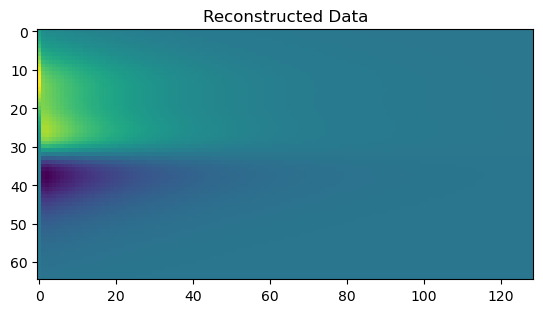

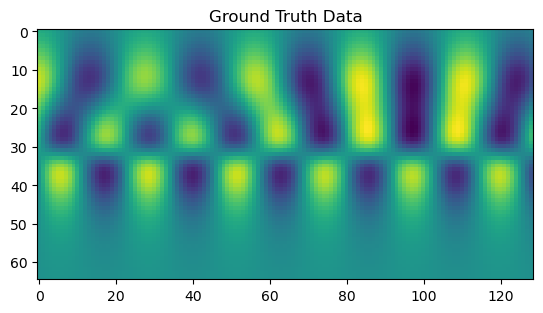

In [15]:
dmd = DMD(svd_rank=4)
dmd.fit(X.T)
plot_summary(dmd)

print("Computed frequencies:")
print(np.round(np.log(dmd.eigs) / dt, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(dmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()

## This is what happens without time-delay embeddings (with noise and exact DMD)


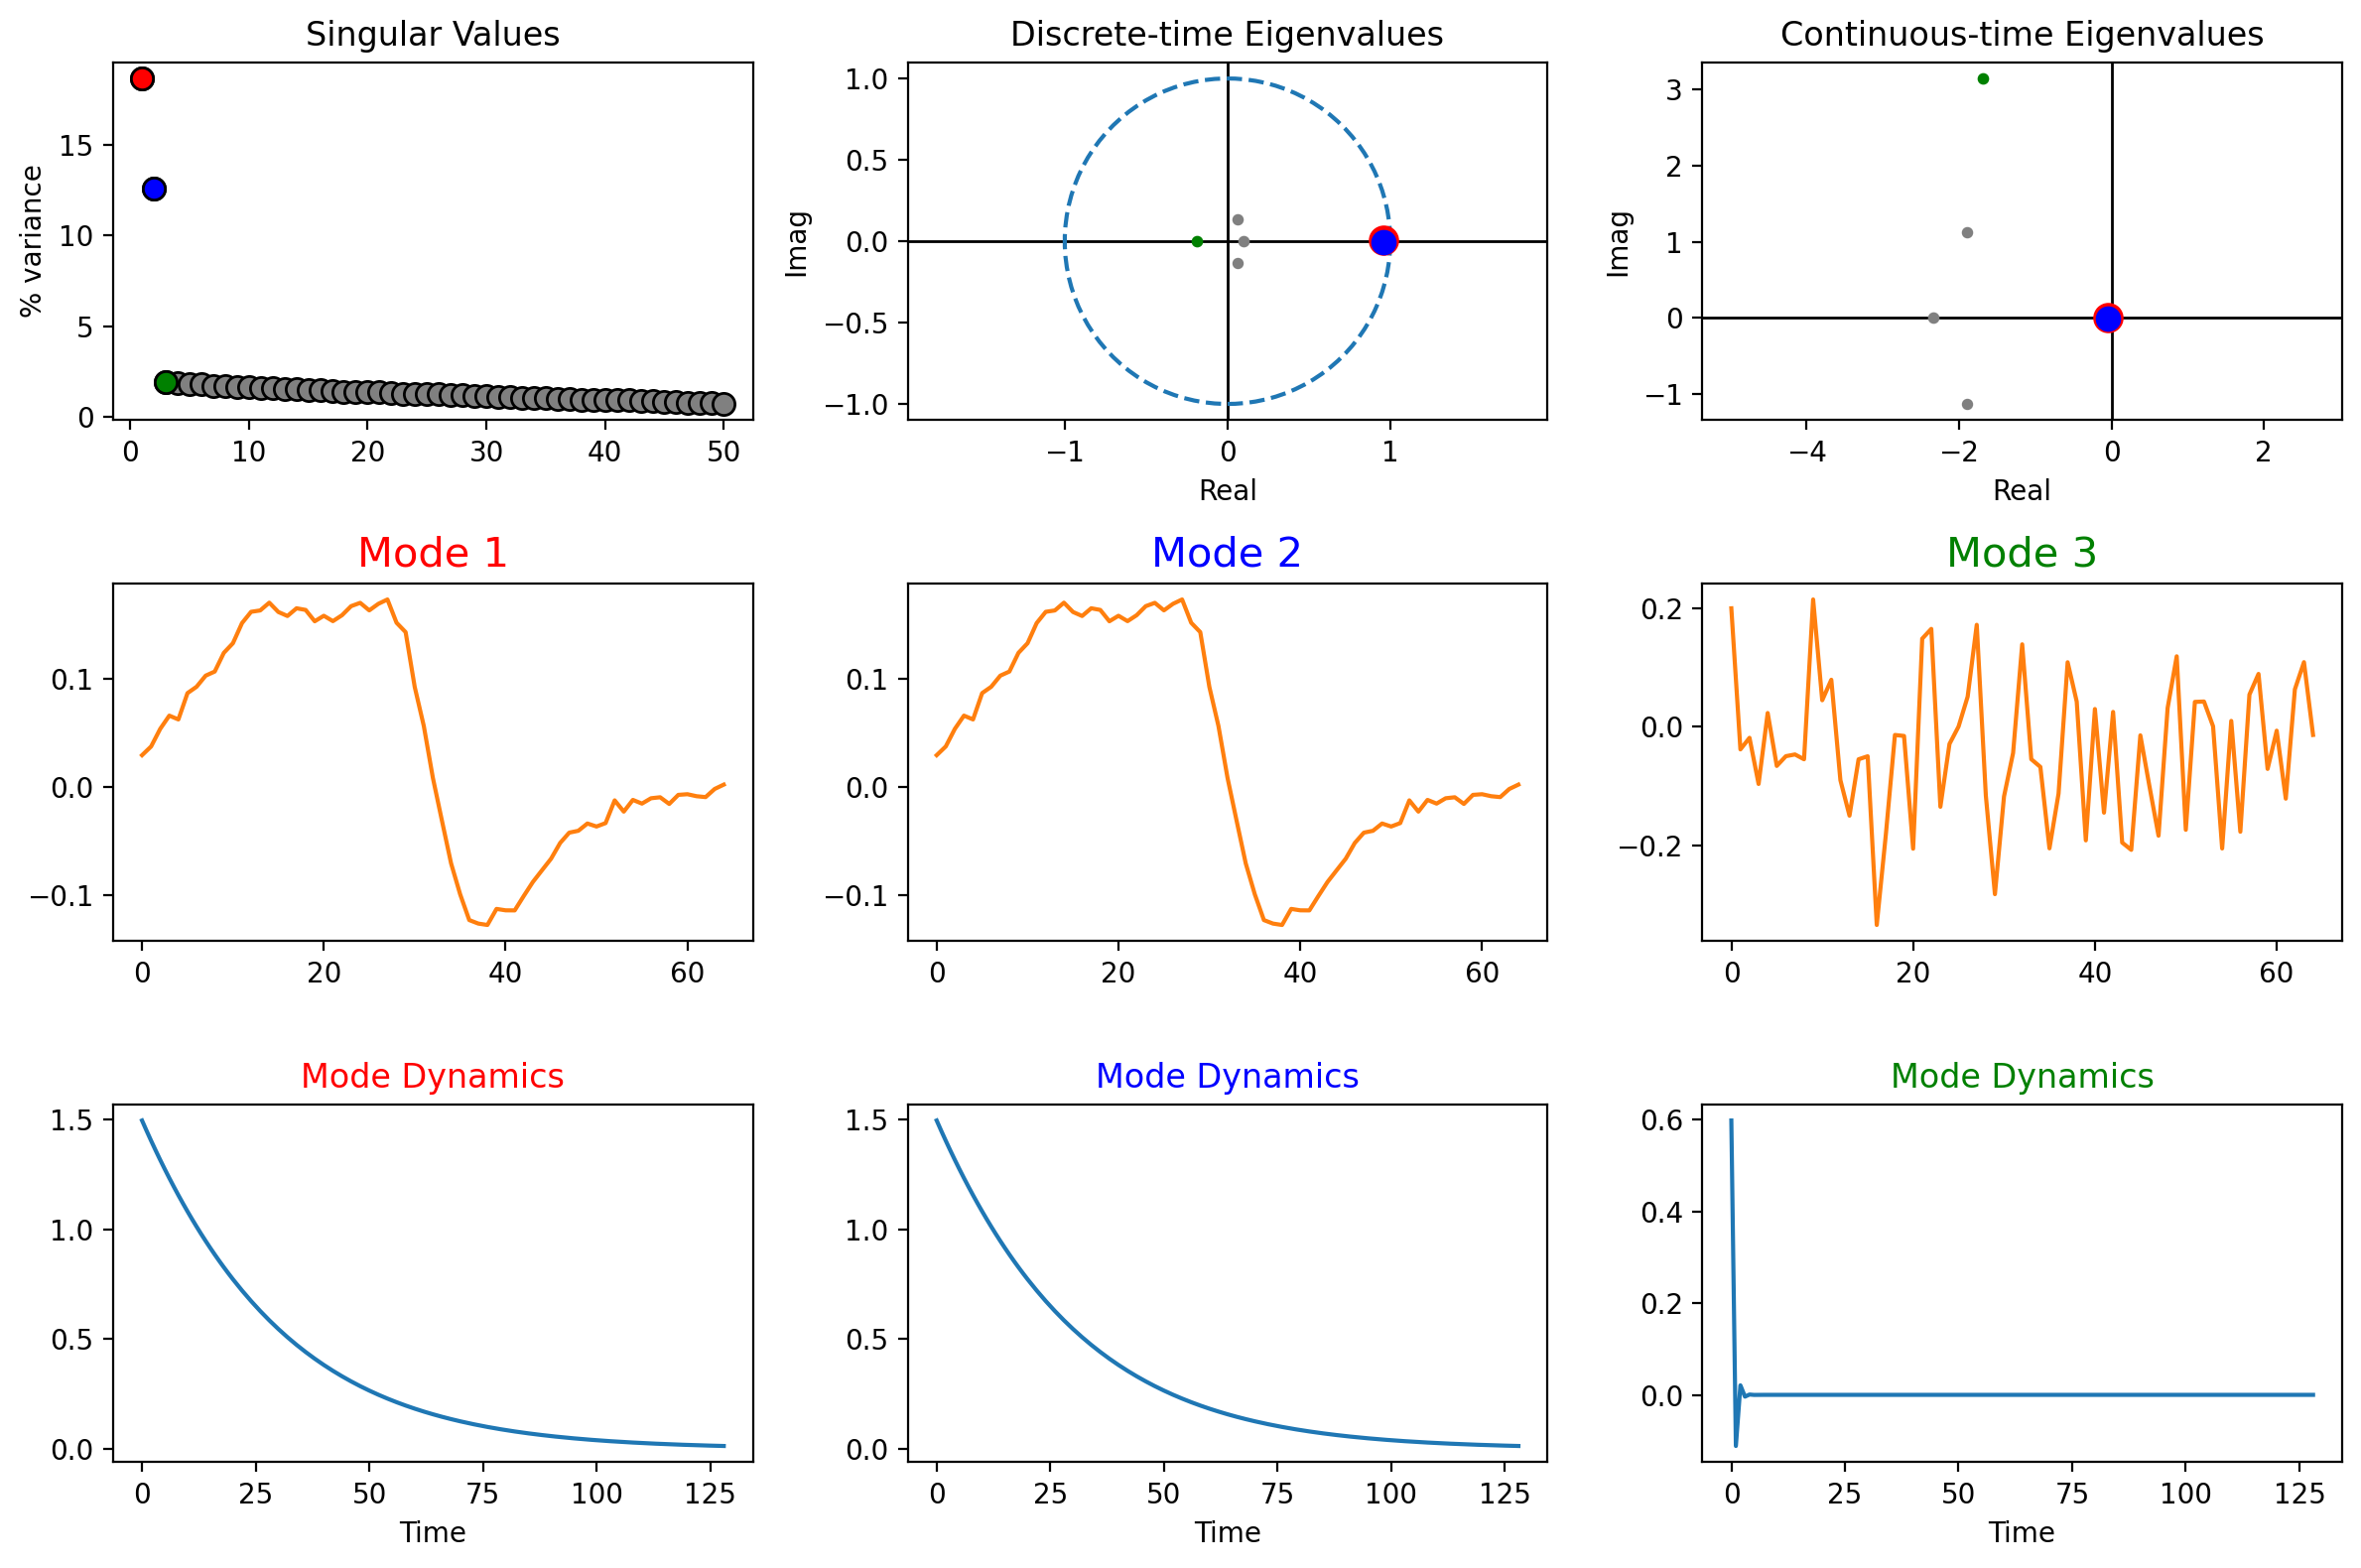

Computed frequencies:
[ -0.431 +0.066j  -0.431 -0.066j -17.115+32.j    -19.252+11.507j
 -19.252-11.507j -23.852 +0.j   ]


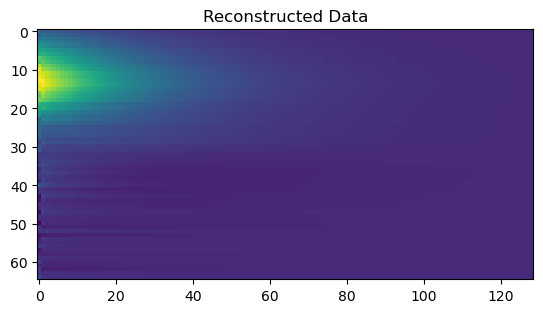

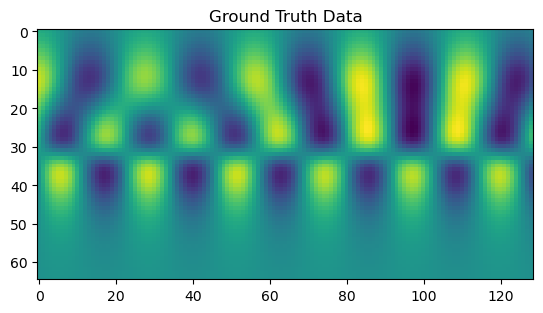

In [16]:
dmd = DMD(svd_rank=6)
dmd.fit(Xn.T)
plot_summary(dmd)

print("Computed frequencies:")
print(np.round(np.log(dmd.eigs) / dt, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(dmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()


## exact DMD with noise, but time-delay embedding


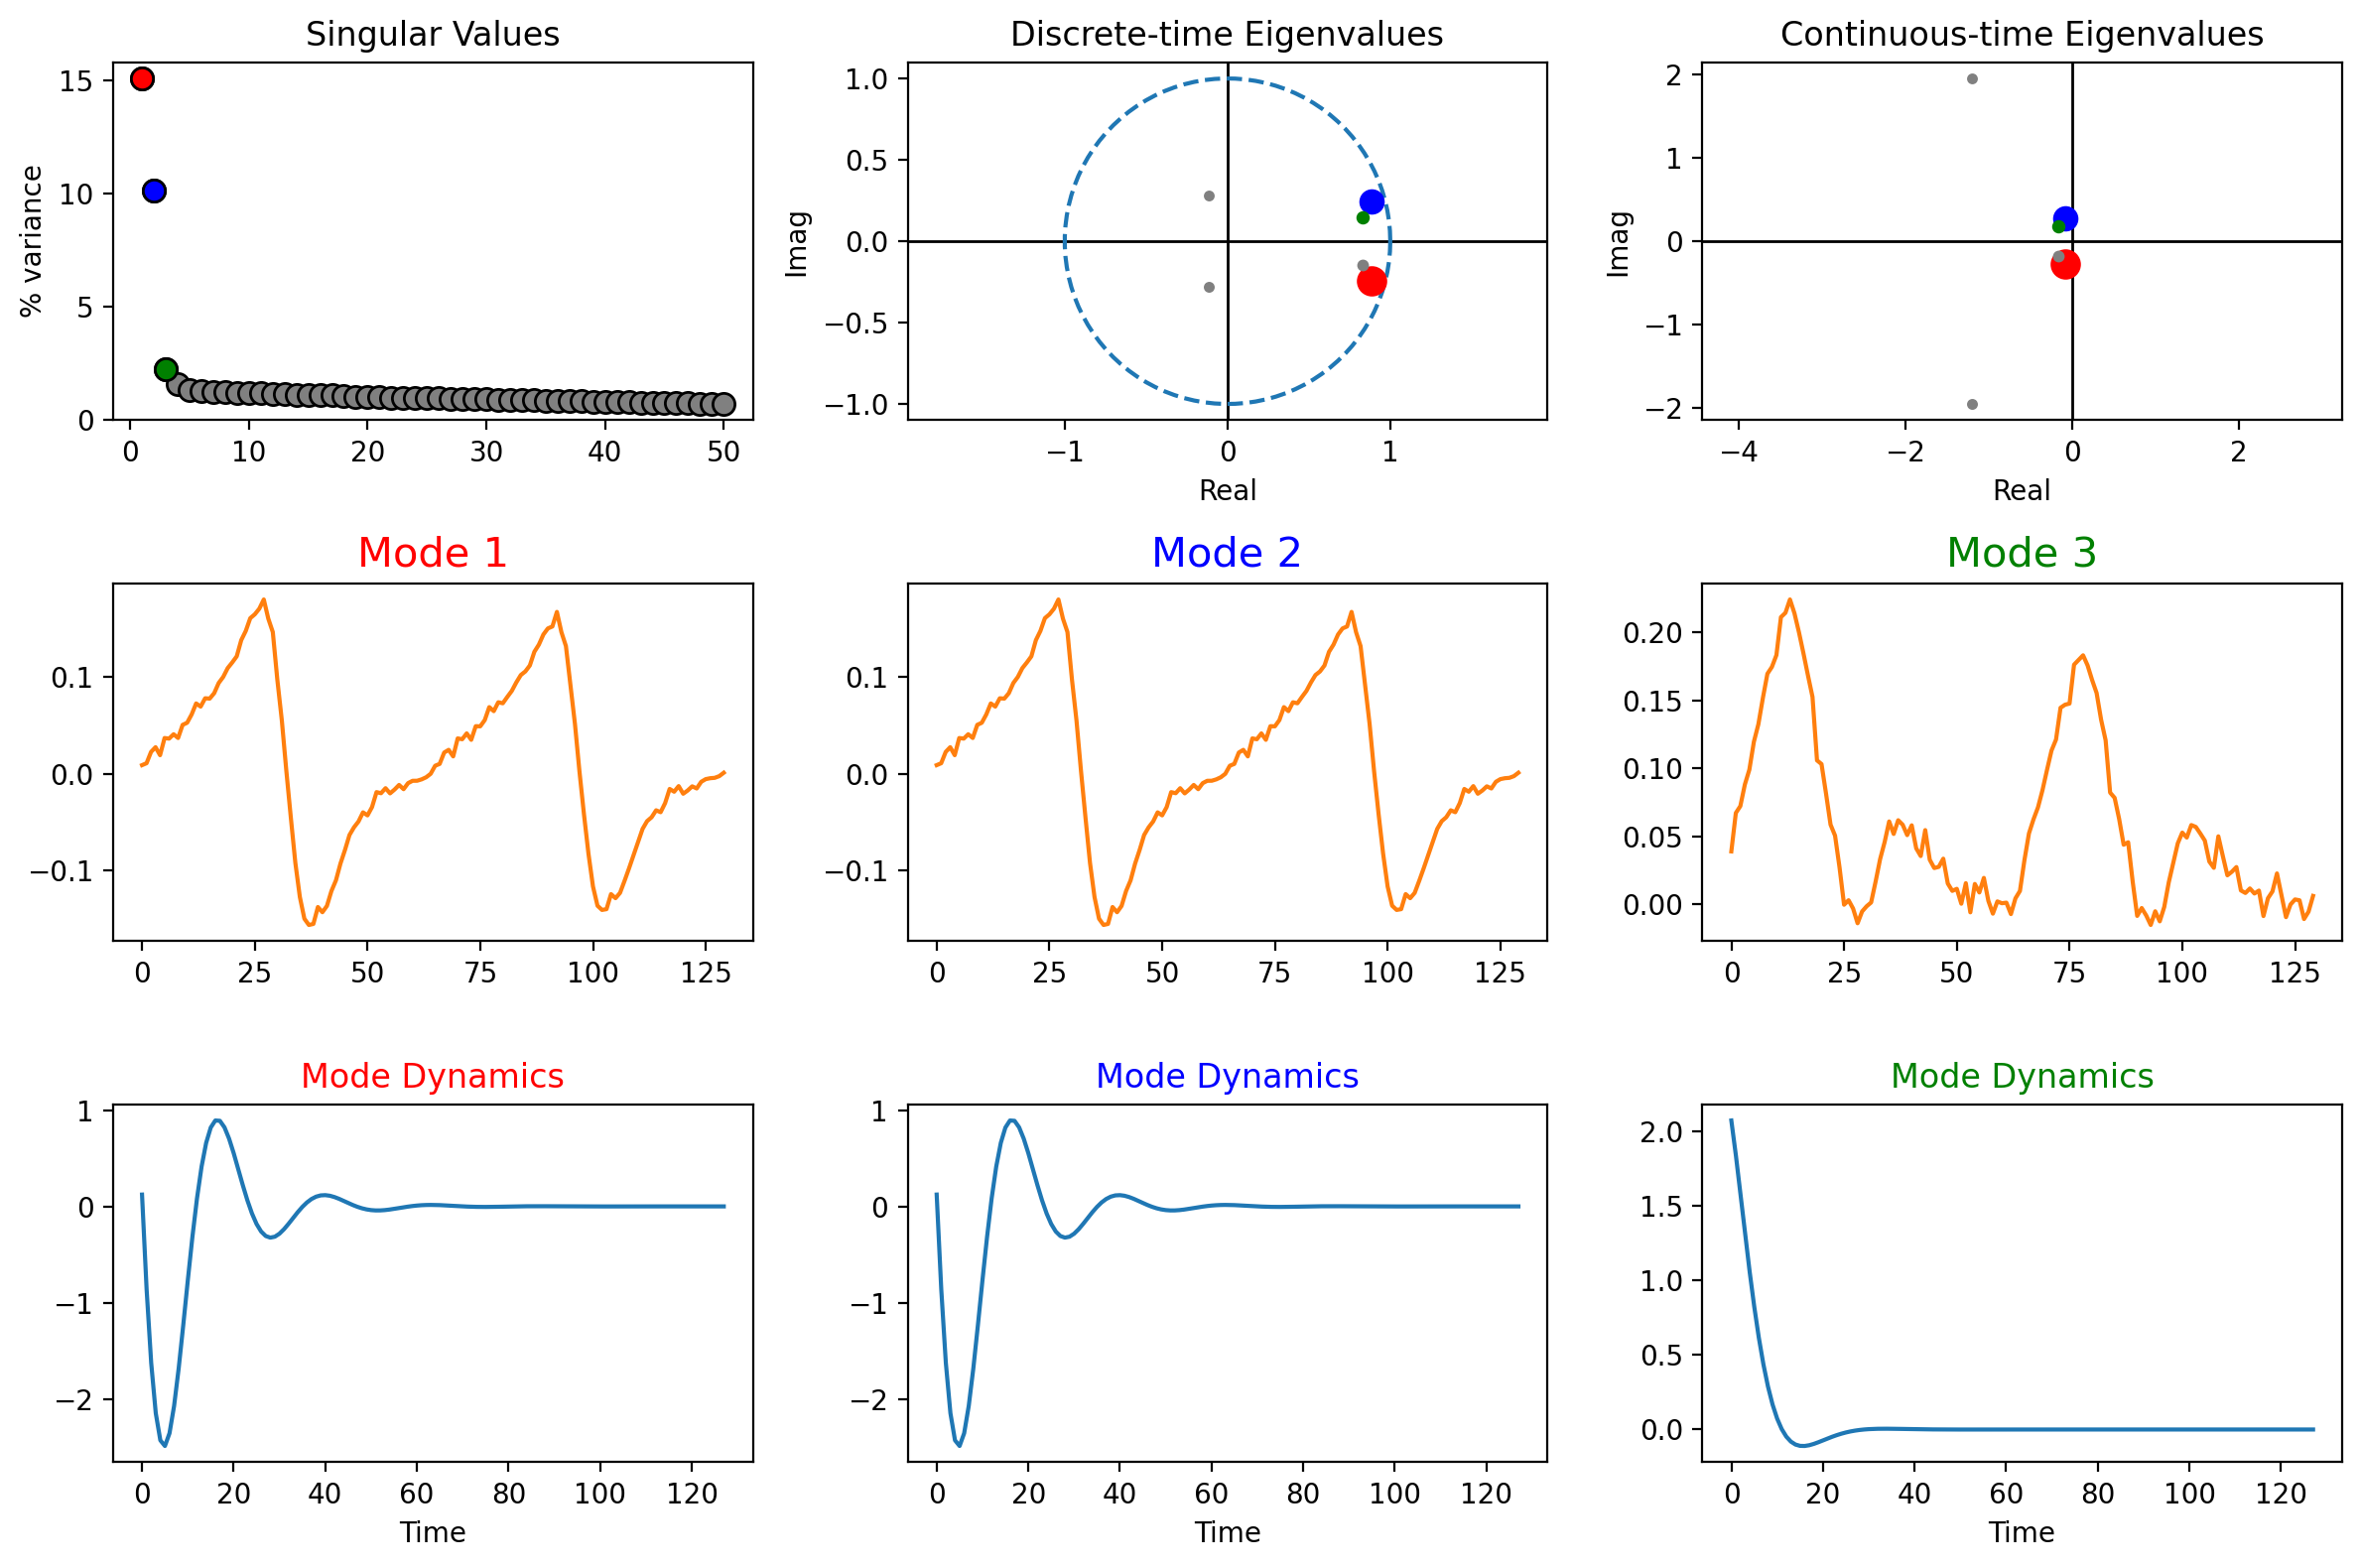

Computed frequencies:
[ 0.883+0.244j  0.883-0.244j  0.83 +0.147j  0.83 -0.147j -0.112+0.28j
 -0.112-0.28j ]


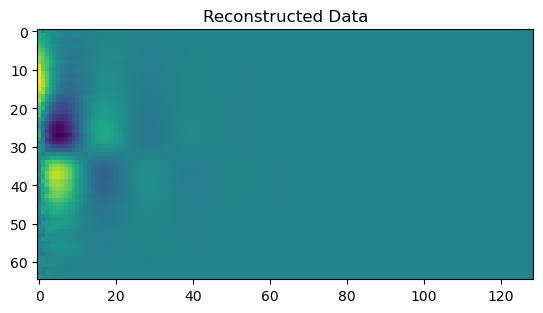

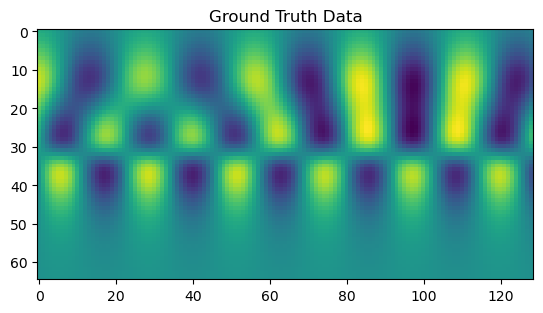

In [17]:
delay_dmd = hankel_preprocessing(DMD(svd_rank=6), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_dmd.fit(Xn.T)
plot_summary(delay_dmd)

print("Computed frequencies:")
print(np.round(delay_dmd.eigs, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(delay_dmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()

## BOP DMD with noise, NO time-delay embedding


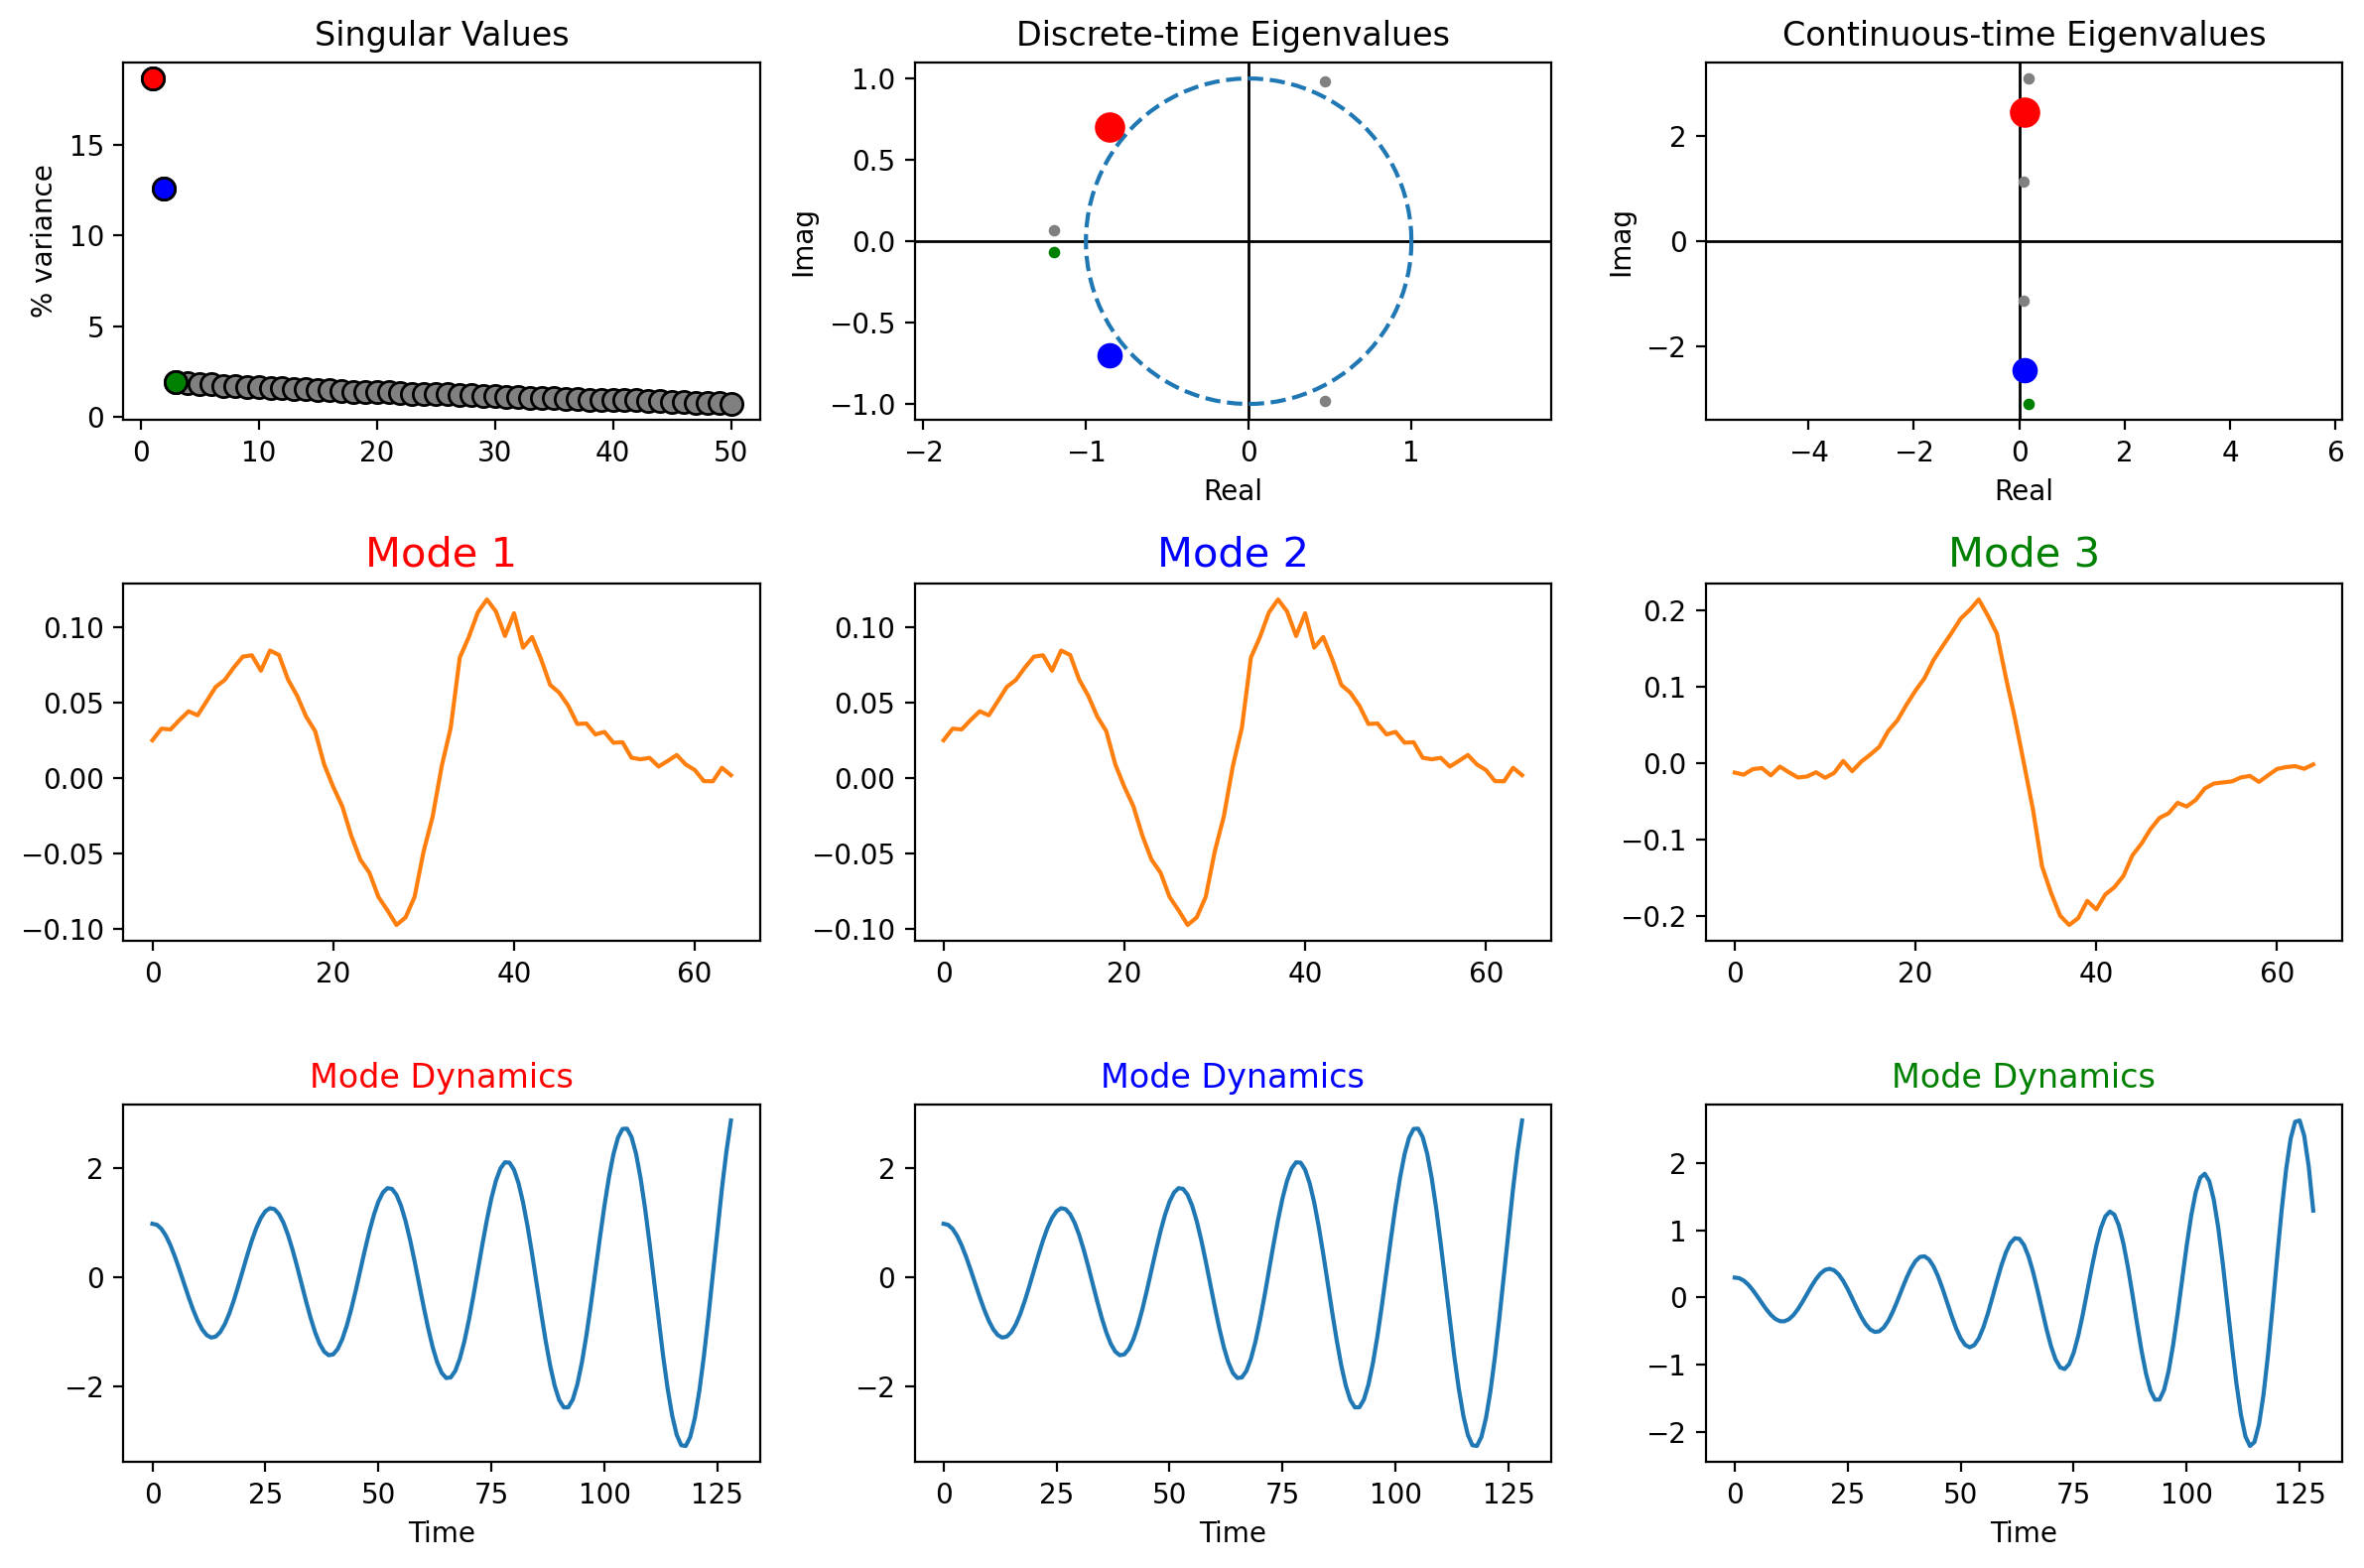

Computed frequencies:
[0.179+3.087j 0.179-3.087j 0.085+1.125j 0.085-1.125j 0.101-2.453j
 0.101+2.453j]


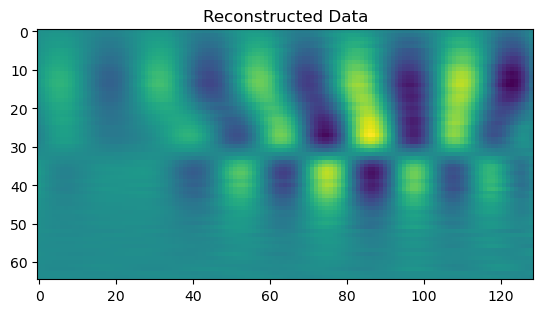

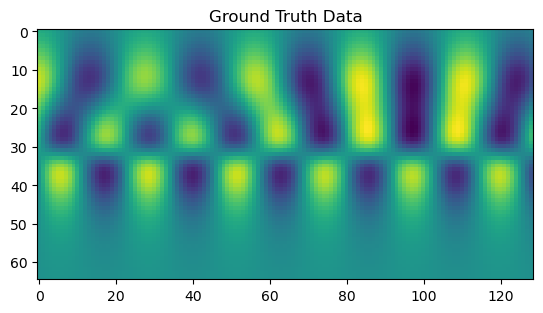

In [18]:
optdmd = BOPDMD(svd_rank=6, num_trials=0)
optdmd.fit(Xn.T, t)
plot_summary(optdmd, index_modes=[0,1,2], order='F')

print("Computed frequencies:")
print(np.round((optdmd.eigs), decimals=3))
plt.title("Reconstructed Data")
plt.imshow(optdmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()


## BOP DMD with noise, NO time-delay embedding with constraints


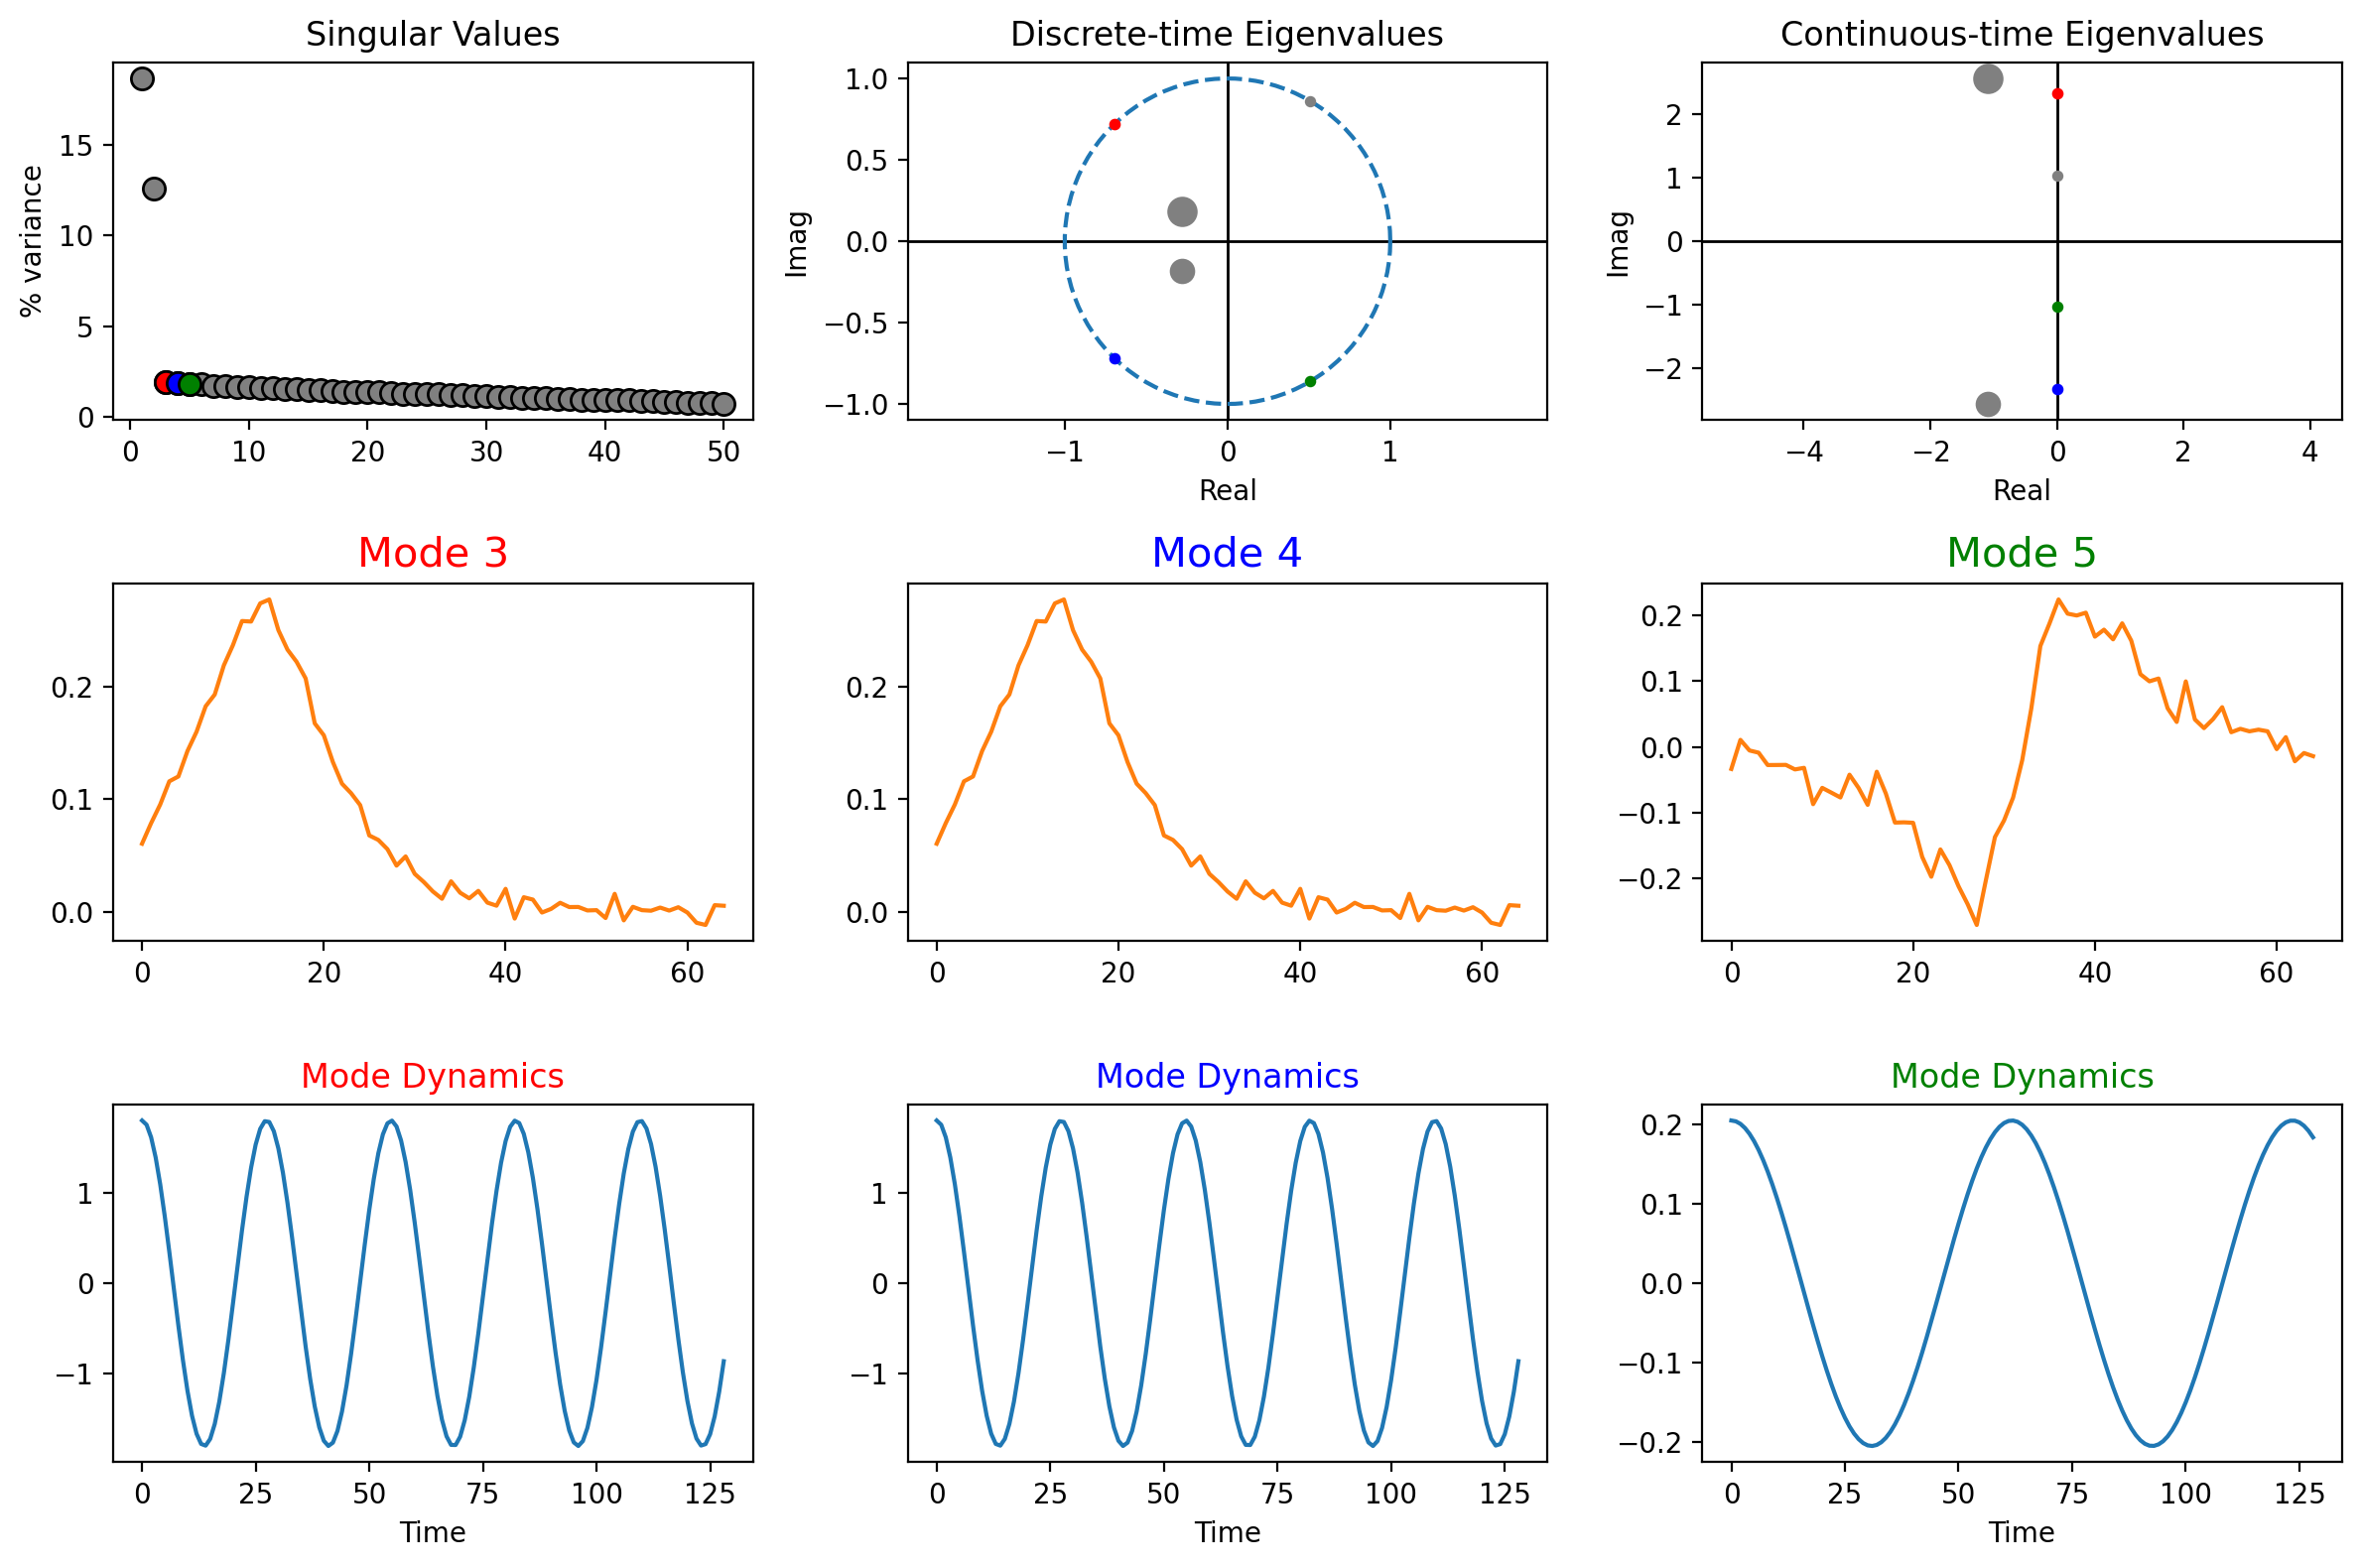

Computed frequencies:
[-1.099+3.713j -1.099-3.713j  0.   +1.037j -0.   -1.037j  0.   +2.335j
 -0.   -2.335j]


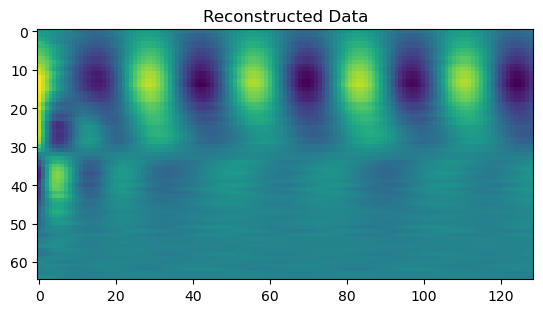

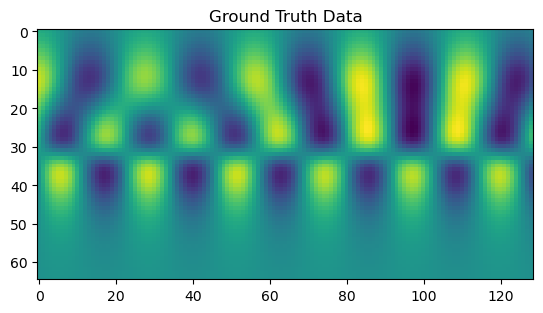

In [21]:
optdmd = BOPDMD(svd_rank=6, num_trials=0, eig_constraints={"stable", "conjugate_pairs"})
optdmd.fit(Xn.T, t)
plot_summary(optdmd, index_modes=[2,3,4], order='F')

print("Computed frequencies:")
print(np.round((optdmd.eigs), decimals=3))
plt.title("Reconstructed Data")
plt.imshow(optdmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(X.T)
plt.show()


The `dmd` object contains the principal information about the decomposition:
- the attribute `modes` is a 2D numpy array where the columns are the low-rank structures individuated; 
- the attribute `dynamics` is a 2D numpy array where the rows refer to the time evolution of each mode;
- the attribute `eigs` refers to the eigenvalues of the low dimensional operator;
- the attribute `reconstructed_data` refers to the approximated system evolution.

Moreover, some helpful methods for the graphical representation are provided.

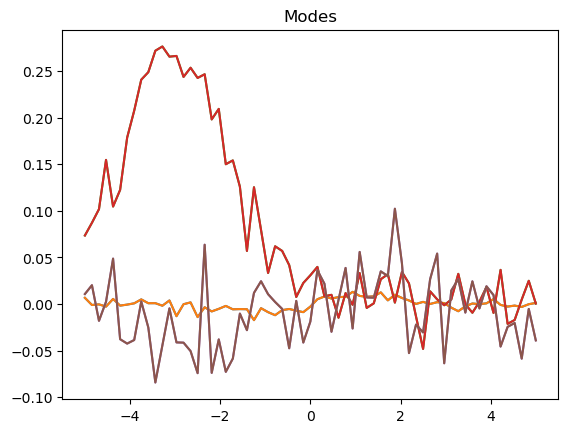

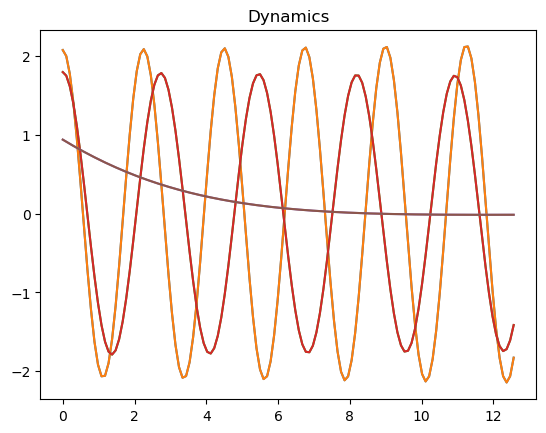

In [43]:
for mode in optdmd.modes.T:
    plt.plot(x, mode.real)
    plt.title("Modes")
plt.show()

for dynamic in optdmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title("Dynamics")
plt.show()

Eigenvalue (0.0026132073703763214+2.7937383268800753j): distance from unit circle 1.7937395490509567
Eigenvalue (0.0026132073703378973-2.7937383268801748j): distance from unit circle 1.7937395490510561
Eigenvalue (-0.002218705783398326+2.2998532305121135j): distance from unit circle 1.2998543007226258
Eigenvalue (-0.0022187057833149165-2.2998532305121806j): distance from unit circle 1.2998543007226928
Eigenvalue (-0.2941706782174168-0.18084971884013537j): distance from unit circle 0.65468418986752
Eigenvalue (-0.29417067819328885+0.18084971880659906j): distance from unit circle 0.654684189905638


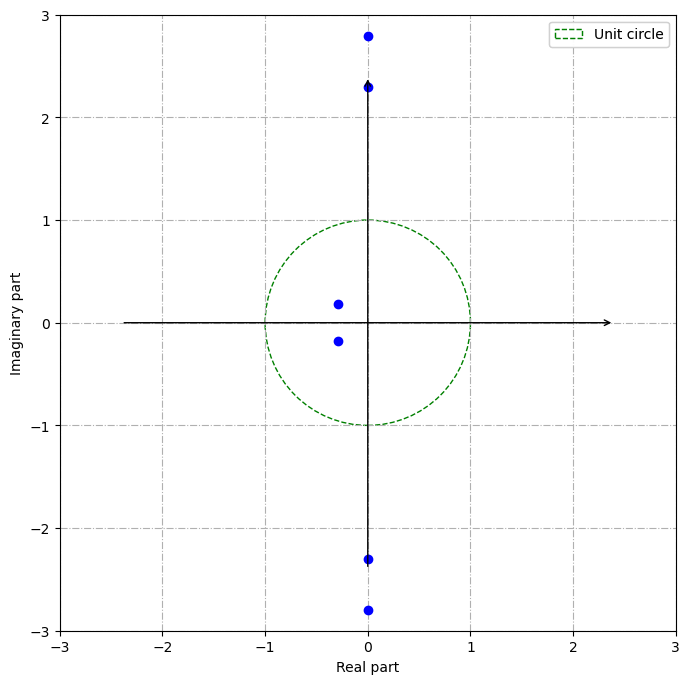

In [44]:
for eig in optdmd.eigs:
    print(
        "Eigenvalue {}: distance from unit circle {}".format(
            eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)
        )
    )

plot_eigs(optdmd, show_axes=True, show_unit_circle=True)

#plot_eigs(optdmd, show_axes=True)